In [2]:
import pandas as pd 
import numpy as np 

In [3]:
df = pd.read_csv("Stock prices.csv")
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [3]:
X = df.drop("close",axis = 1)
y = df["close"]
X.head()

,symbol,date,open,high,low,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,1148391


In [4]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from scipy.sparse import issparse

# Define transformer
transformer = make_column_transformer(
    (OneHotEncoder(sparse_output=False), ['symbol']),
    (StandardScaler(), ['open', 'high', 'low', 'volume']) # sparse_output=False(Return a normal NumPy array)
)

# Fit and transform your features (assume X is your input dataframe)
X_transformed = transformer.fit_transform(X)

# Optional: Convert to dense array if result is sparse
if issparse(X_transformed):
    X_transformed = X_transformed.toarray()


In [5]:
import numpy as np

# Assuming y is a pandas Series or list
y = np.array(y)

# apply y scaler
y_scaler = StandardScaler()

# Now reshape it to 2D
y_transformed = y_scaler.fit_transform(y.reshape(-1, 1))


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

In [8]:
model = models.Sequential()
model.add(layers.Dense(512, input_dim=X_transformed.shape[1] , activation='relu'))
model.add(layers.Dense(128 , activation='relu'))
model.add(layers.Dense(64 , activation='relu'))
model.add(layers.Dense(1, activation='linear'))
model.summary()

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         261,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 335,105 (1.28 MB)

 Trainable params: 335,105 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [10]:
model.fit(X_transformed,y_transformed,epochs=50)

Epoch 1/50
15546/15546 ━━━━━━━━━━━━━━━━━━━━ 166s 10ms/step - loss: 0.8489 - mae: 0.4215
Epoch 2/50
15546/15546 ━━━━━━━━━━━━━━━━━━━━ 165s 11ms/step - loss: 1.0291 - mae: 0.4918
Epoch 3/50
15546/15546 ━━━━━━━━━━━━━━━━━━━━ 154s 10ms/step - loss: 1.0266 - mae: 0.4913
Epoch 4/50
15546/15546 ━━━━━━━━━━━━━━━━━━━━ 147s 9ms/step - loss: 0.9983 - mae: 0.4884
Epoch 5/50
15546/15546 ━━━━━━━━━━━━━━━━━━━━ 144s 9ms/step - loss: 1.0189 - mae: 0.4912
Epoch 6/50
15546/15546 ━━━━━━━━━━━━━━━━━━━━ 148s 10ms/step - loss: 1.0099 - mae: 0.4909
Epoch 7/50
15546/15546 ━━━━━━━━━━━━━━━━━━━━ 152s 10ms/step - loss: 1.0143 - mae: 0.4888
Epoch 8/50
15546/15546 ━━━━━━━━━━━━━━━━━━━━ 153s 10ms/step - loss: 0.9940 - mae: 0.4888
Epoch 9/50
15546/15546 ━━━━━━━━━━━━━━━━━━━━ 152s 10ms/step - loss: 1.0083 - mae: 0.4900
Epoch 10/50
15546/15546 ━━━━━━━━━━━━━━━━━━━━ 163s 10ms/step - loss: 1.0059 - mae: 0.4887
Epoch 11/50
15546/15546 ━━━━━━━━━━━━━━━━━━━━ 160s 10ms/step - loss: 0.9701 - mae: 0.4863
Epoch 12/50
15546/15546 ━━━━━━━━

In [29]:
# Use the same preprocessing (scaling + one-hot) on the test features
X_test_transformed = transformer.transform(X_test)
# Scale the test target values (y_test) the same way we scaled y during training
y_test_transformed = y_scaler.transform(y_test.reshape(-1, 1))

In [25]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_transformed, y_test_transformed, verbose=1)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")

4664/4664 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.9824 - mae: 0.4853
Test Loss (MSE): 1.0093687772750854
Test MAE: 0.4878498613834381


In [26]:
# Make predictions
y_pred_transformed = model.predict(X_test_transformed)

4664/4664 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step


In [27]:
# Inverse transform predictions back to original price scale
y_pred = y_scaler.inverse_transform(y_pred_transformed)
y_true = y_test  # already in original scale

In [28]:
# Show first few predictions vs actual
for i in range(10):
    print(f"Actual: {y_true[i]:.2f}, Predicted: {y_pred[i][0]:.2f}")

Actual: 103.91, Predicted: 85.54
Actual: 71.17, Predicted: 85.54
Actual: 47.71, Predicted: 85.54
Actual: 155.50, Predicted: 85.54
Actual: 62.92, Predicted: 85.54
Actual: 93.87, Predicted: 85.54
Actual: 58.18, Predicted: 85.54
Actual: 183.40, Predicted: 85.54
Actual: 65.96, Predicted: 85.54
Actual: 121.01, Predicted: 85.54


In [23]:
# Example test input (must match your features: symbol, open, high, low, volume)
import pandas as pd

test_sample = pd.DataFrame([{
    'symbol': 'AAPL',
    'open': 100,
    'high': 105,
    'low': 98,
    'volume': 5000000
}])

# Apply preprocessing
X_new = transformer.transform(test_sample)

# Predict scaled value
y_pred_scaled = model.predict(X_new)

# Convert back to real price
y_pred_real = y_scaler.inverse_transform(y_pred_scaled)

print("Predicted Stock Price:", y_pred_real[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predicted Stock Price: 85.53509


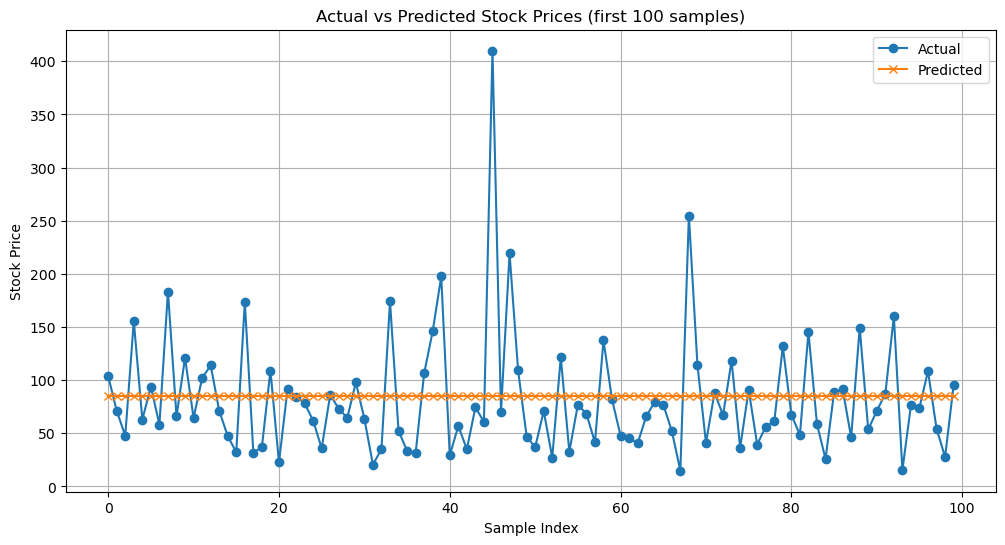

In [20]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted
plt.figure(figsize=(12,6))
plt.plot(y_true[:100], label="Actual", marker='o')
plt.plot(y_pred[:100], label="Predicted", marker='x')
plt.title("Actual vs Predicted Stock Prices (first 100 samples)")
plt.xlabel("Sample Index")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()
